In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.transform import resize
from skimage.color import rgb2gray
import json

from fastai.vision.all import Path, Image

import numpy as np

In [25]:
# IMAGE_DIRECTORY = Path('/storage/2dmatpedia/images/no_dos_bw/low_dpi_bands')
OUTPUT_DIMENSIONS = (64, 64)
DATA_DIRECTORY = Path("../../../storage/2dmatpedia")
LINEWIDTH = 3
output_name = f"dpi_none_thickness_{LINEWIDTH}_{OUTPUT_DIMENSIONS[0]}x{OUTPUT_DIMENSIONS[1]}_binary"

## High DPI

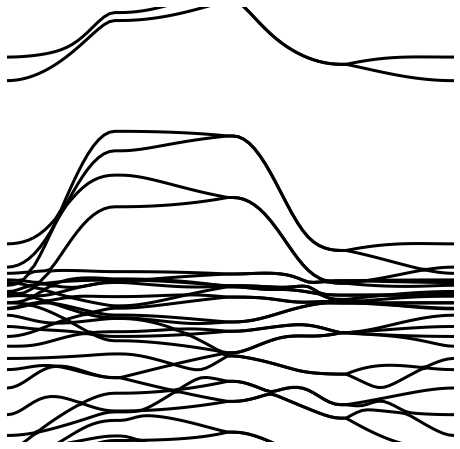

In [26]:
fig, ax = plt.subplots(figsize=(8, 8))

bands_dict=json.load(open(DATA_DIRECTORY/"bands/2dm-4000.json"))
energies_minus_efermi = np.array(bands_dict["bands"]["1"]) - bands_dict["efermi"]
ax.set_ylim([-4, +4])
ax.set_xlim([0, energies_minus_efermi.shape[1]-1])


for band in energies_minus_efermi:
    ax.plot(band, c="black", linewidth=LINEWIDTH)

# If we haven't already shown or saved the plot, then we need to
# draw the figure first...
ax.axis("off")
fig.canvas.draw()

# Now we can save it to a numpy array.
data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))

# now crop out axis, resize & grayscale:
data = data[70:-72, 72:-58]
image = Image.fromarray(data)


# # and replot:
# fig, ax = plt.subplots(figsize=(8, 8))
# ax.imshow(data)

# Save them

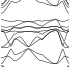

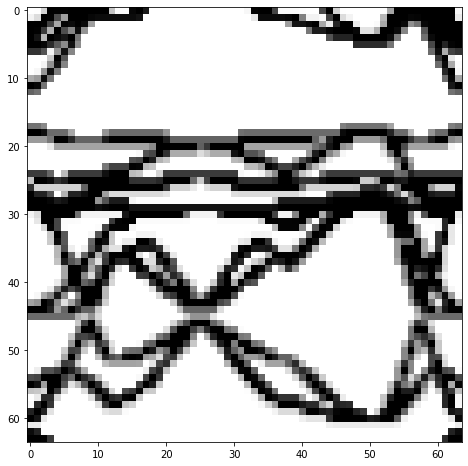

In [6]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=11)

bands_dict=json.load(open(DATA_DIRECTORY/"bands/2dm-4.json"))
energies_minus_efermi = np.array(bands_dict["bands"]["1"]) - bands_dict["efermi"]
ax.set_ylim([-4, +4])
ax.set_xlim([0, energies_minus_efermi.shape[1]-1])

LINEWIDTH = 3

for band in energies_minus_efermi:
    ax.plot(band, c="black", linewidth=LINEWIDTH)

# If we haven't already shown or saved the plot, then we need to
# draw the figure first...
ax.axis("off")
fig.canvas.draw()

# Now we can save it to a numpy array.
data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))

# now crop out axis, resize & grayscale:
# data = data[70:-72, 72:-58]
data = data[11:-11, 11:-9]
data = resize(data, OUTPUT_DIMENSIONS)

# and replot:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(data)

In [34]:
material_df = pd.read_csv("material_flatness_scores_anupam.csv", index_col="ID")
material_df.head()

,formula,gen_formula,space_group,segments,flat_segments,flatness_score,discovery,binary_flatness,horz_flat_seg,exfoliation_eg,...,A,B,C,D,E,F,radio,f_orb,sg_sto_group,percentage_flat
ID,,,,,,,,,,,,,,,,,,,,,
2dm-1,IrF2,AB2,164,3,0,0.095102,bottom-up,0,0,0.234620,...,F,Ir,NaN,NaN,NaN,NaN,non-radioactive,no-f-in-valence,NaN,NaN
2dm-2,Ba2Sb,AB2,164,3,1,0.387410,bottom-up,0,0,0.210650,...,Ba,Sb,NaN,NaN,NaN,NaN,non-radioactive,no-f-in-valence,NaN,NaN
2dm-3,TlS,AB,2,4,4,0.846460,bottom-up,1,3,0.095794,...,S,Tl,NaN,NaN,NaN,NaN,non-radioactive,no-f-in-valence,276.0,24.2
2dm-4,MoCl2,AB2,166,5,4,0.713760,bottom-up,0,0,-0.055818,...,Cl,Mo,NaN,NaN,NaN,NaN,non-radioactive,no-f-in-valence,NaN,NaN
2dm-6,RuI2,AB2,164,3,1,0.264930,bottom-up,0,0,0.084831,...,I,Ru,NaN,NaN,NaN,NaN,non-radioactive,no-f-in-valence,NaN,NaN


In [36]:
!mkdir {DATA_DIRECTORY}/images/grayscale_4ev_linewidth3

In [ ]:
output = np.zeros((len(material_df), *OUTPUT_DIMENSIONS))
                  
for i, material_id in enumerate(material_df.index):
    bands_dict=json.load(open(DATA_DIRECTORY/f"bands/{material_id}.json"))
    output_path = DATA_DIRECTORY/f"images/grayscale_4ev_linewidth3/{material_id}.png"
    energies_minus_efermi = np.array(bands_dict["bands"]["1"]) - bands_dict["efermi"]
    
    if i % 100 == 0:
        print(i, "/", len(material_df))
        
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_ylim([-4, +4])
    ax.set_xlim([0, energies_minus_efermi.shape[1]-1])


    for band in energies_minus_efermi:
        ax.plot(band, c="black", linewidth=LINEWIDTH)

    # If we haven't already shown or saved the plot, then we need to
    # draw the figure first...
    ax.axis("off")
    fig.canvas.draw()

    # Now we can save it to a numpy array.
    data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    # now crop out axis, resize & grayscale:
    data = data[70:-72, 72:-58]
    image = Image.fromarray(data)
    image.save(output_path)
    
    plt.close()

0 / 5270
100 / 5270
